In [2]:
# ============================
# Import Dataset
# ============================
import pandas as pd
file_path = "sample_africa. csv"
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)
print(df)

            Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/05/11  37.56  20.35   33.0  6.4     339   14   110  16:59:48.2   
1     1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
2     1977/01/06  -2.51  28.70   21.0  5.3     241   45   -90  18:33:43.5   
3     1977/01/07 -31.28 -13.24   33.0  5.5      18   46   -59  14:38:22.4   
4     1977/02/24 -11.69 -13.62   33.0  5.5      74   71    11  08:51:16.6   
...          ...    ...    ...    ...  ...     ...  ...   ...         ...   
2383  2020/12/13 -17.75 -12.75   10.0  4.9     210   40   -32  06:42:00.0   
2384  2020/12/17  35.66  26.26   10.0  4.8     164   45  -116  13:36:45.4   
2385  2020/12/23  38.41  22.07   10.0  4.8     295   44   -59  14:58:24.7   
2386  2020/12/27  38.46  39.23    9.0  5.5     231   36   -22  06:37:32.9   
2387  2020/12/30  -1.25 -13.66   10.0  4.7     341   89     1  21:58:16.1   

                    Datetime  
0    1976-05-11 16:59:48.200  
1    1976-11-

In [3]:
# ============================================
# Raw Data Distribution Before Declustering
# ============================================

In [3]:
# Calculate the interval time before declustering
df_compare = df.copy()
df_compare['inter_arrival'] = (df_compare['Datetime'].diff().dt.total_seconds())/86400
print(df_compare)

            Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/05/11  37.56  20.35   33.0  6.4     339   14   110  16:59:48.2   
1     1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
2     1977/01/06  -2.51  28.70   21.0  5.3     241   45   -90  18:33:43.5   
3     1977/01/07 -31.28 -13.24   33.0  5.5      18   46   -59  14:38:22.4   
4     1977/02/24 -11.69 -13.62   33.0  5.5      74   71    11  08:51:16.6   
...          ...    ...    ...    ...  ...     ...  ...   ...         ...   
2383  2020/12/13 -17.75 -12.75   10.0  4.9     210   40   -32  06:42:00.0   
2384  2020/12/17  35.66  26.26   10.0  4.8     164   45  -116  13:36:45.4   
2385  2020/12/23  38.41  22.07   10.0  4.8     295   44   -59  14:58:24.7   
2386  2020/12/27  38.46  39.23    9.0  5.5     231   36   -22  06:37:32.9   
2387  2020/12/30  -1.25 -13.66   10.0  4.7     341   89     1  21:58:16.1   

                    Datetime  inter_arrival  
0    1976-05-11 16:59:48.200 

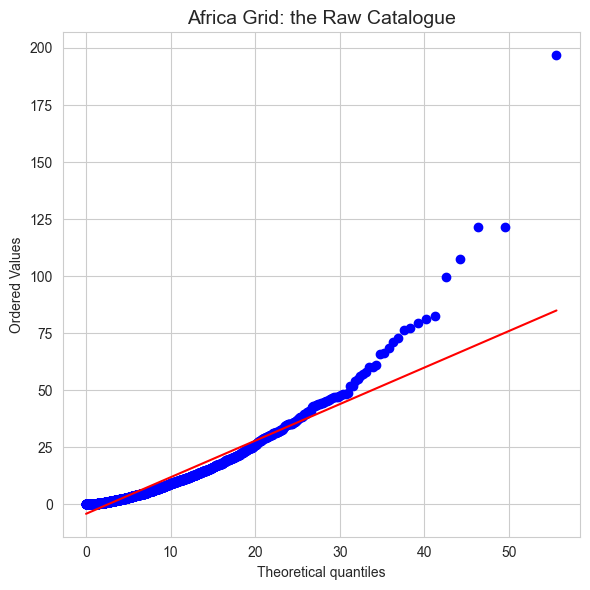

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import probplot

x = df_compare['inter_arrival'].dropna()
loc, scale = expon.fit(x)

plt.figure(figsize=(6, 6))
probplot(x, dist=expon, sparams=(loc, scale), plot=plt)
plt.title("Africa Grid: the Raw Catalogue", fontsize=14)
plt.tight_layout()
plt.savefig("qq_africa_raw.png", dpi=300)
plt.show()

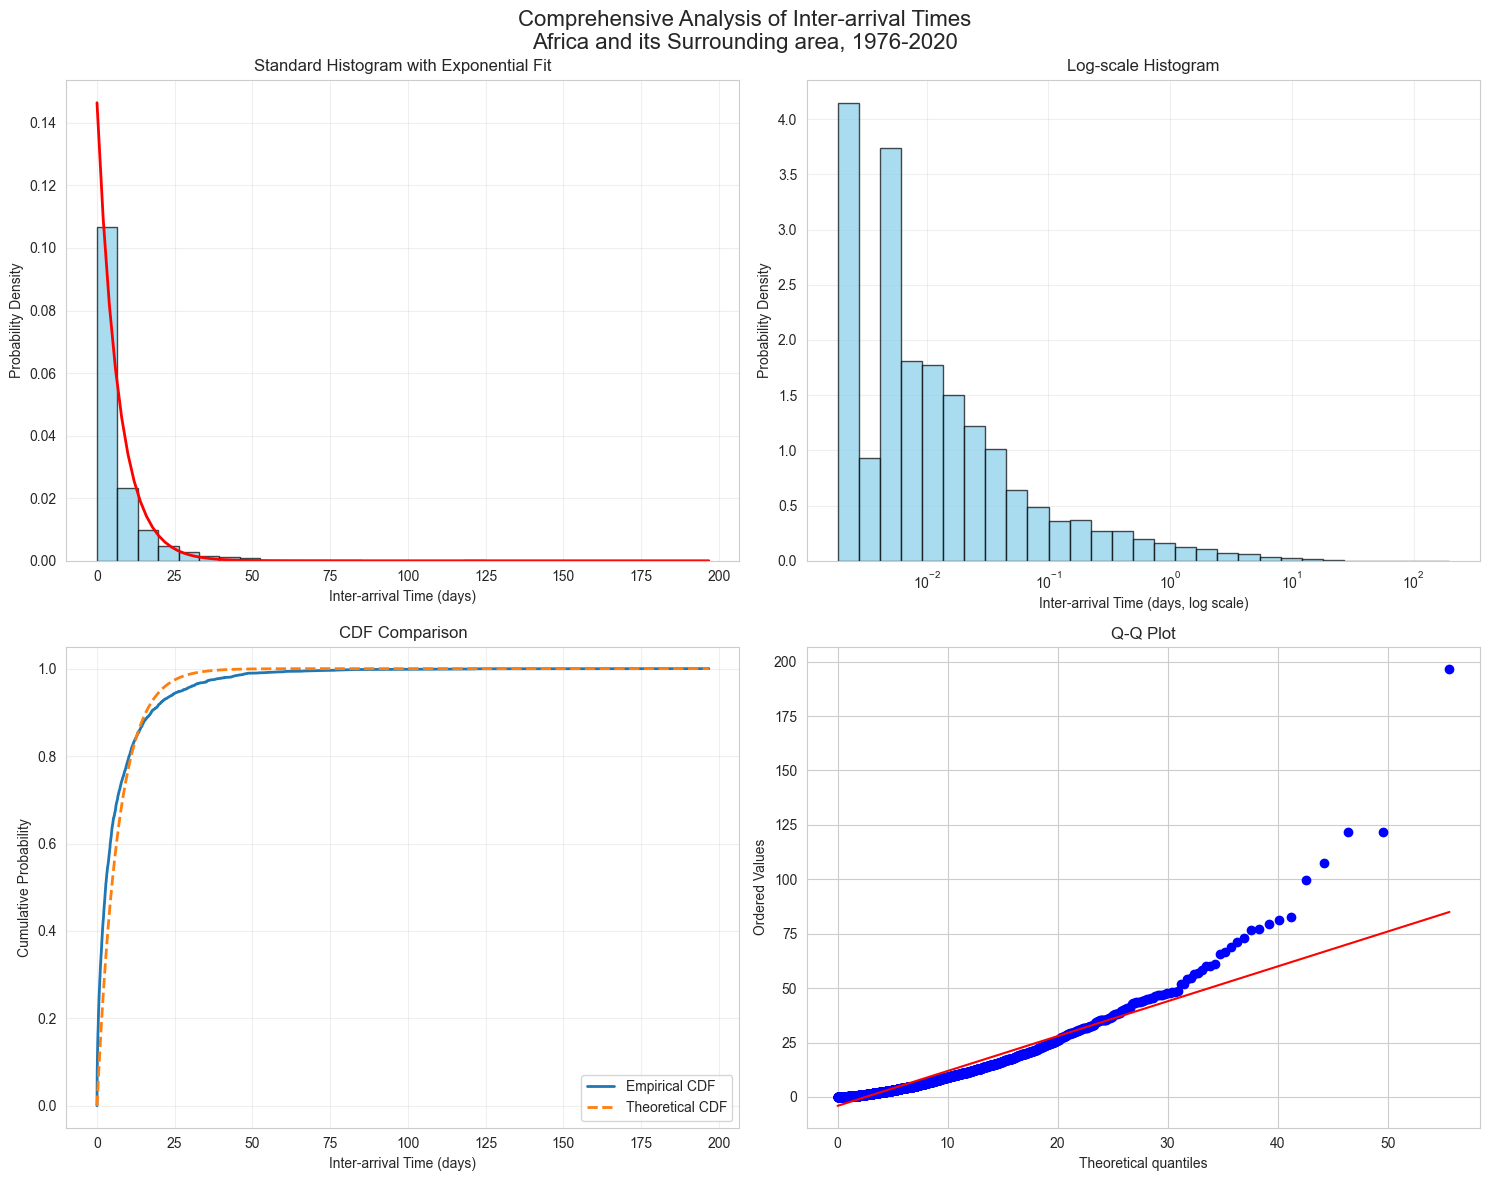

In [12]:
# Comprehensive analysis for the raw catalogue
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standard Histogram with Exponential Fit (Top-Left)
axes[0, 0].hist(x, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(x.min(), x.max(), 100)
axes[0, 0].plot(x_range, expon.pdf(x_range, loc, scale), 'r-', lw=2)
axes[0, 0].set_title('Standard Histogram with Exponential Fit')
axes[0, 0].set_xlabel('Inter-arrival Time (days)')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)

# Log-scale Histogram (Top-Right)
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 30)
axes[0, 1].hist(x, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('Log-scale Histogram')
axes[0, 1].set_xlabel('Inter-arrival Time (days, log scale)')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)

# CDF Comparison (Bottom-Left)
x_sorted = np.sort(x)
y_ecdf = np.arange(1, len(x_sorted)+1) / len(x_sorted)
y_theoretical = expon.cdf(x_sorted, loc, scale)
axes[1, 0].plot(x_sorted, y_ecdf, label='Empirical CDF', linewidth=2)
axes[1, 0].plot(x_sorted, y_theoretical, label='Theoretical CDF', linestyle='--', linewidth=2)
axes[1, 0].set_title('CDF Comparison')
axes[1, 0].set_xlabel('Inter-arrival Time (days)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q Plot (Bottom-Right)
probplot(x, dist=expon, sparams=(loc, scale), plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.savefig('comprehensive_analysis_africa_raw.png', dpi=300, bbox_inches='tight')
plt.suptitle('Comprehensive Analysis of Inter-arrival Times\nAfrica and its Surrounding area, 1976-2020', fontsize=16)
plt.tight_layout()
plt.show()

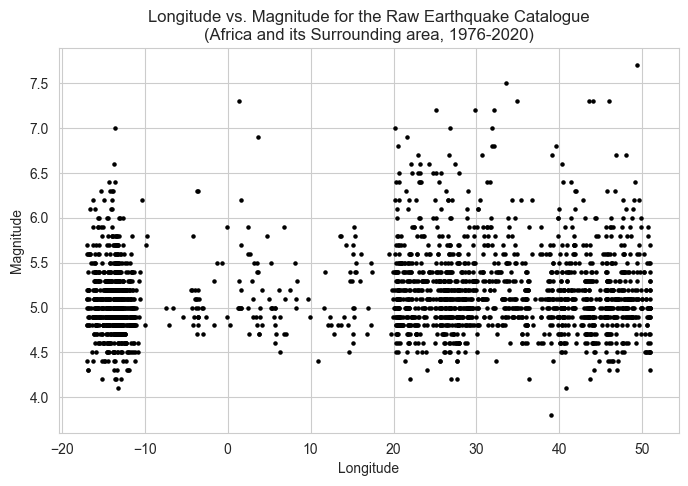

In [7]:
# Lon vs Mag
import matplotlib.pyplot as plt

x = df_compare['Lon']
y = df_compare['Mag']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=5, color='black')
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.title("Longitude vs. Magnitude for the Raw Earthquake Catalogue\n(Africa and its Surrounding area, 1976-2020)")
plt.show()

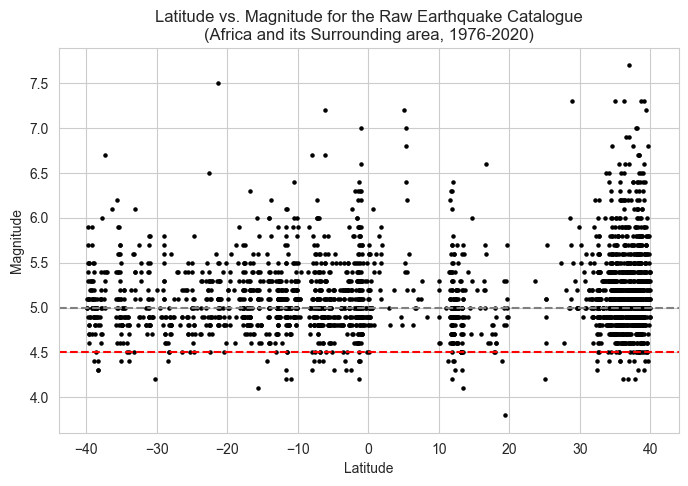

In [5]:
# Lat vs Mag
import matplotlib.pyplot as plt

x = df_compare['Lat']
y = df_compare['Mag']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=5, color='black')
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.title("Latitude vs. Magnitude for the Raw Earthquake Catalogue\n(Africa and its Surrounding area, 1976-2020)")
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.savefig('lat_mag_raw_africa.png', dpi=300)
plt.show()

In [9]:
# KS test
# If p_value > 0.05, we cannot reject the hypothesis that inter-arrival times are exponential.
# This is consistent with a Poisson process.
from scipy.stats import kstest, expon

x = df_compare['inter_arrival'].dropna()
loc, scale = expon.fit(x)
star, p_value = kstest(x, 'expon', args=(loc, scale))

print(f"K-S test p-value: {p_value:.8f}")

Region = "Africa and its surrounding area"
if p_value > 0.05:
    print(f"The inter-arrival time between neighbour earthquake events in the raw catalog of {Region} follows a Poisson process.")
else:
    print(f"The inter-arrival time between neighbour earthquake events in the raw catalog of {Region} does not follow a Poisson process.")

K-S test p-value: 0.00000000
The inter-arrival time between neighbour earthquake events in the raw catalog of Africa and its surrounding area does not follow a Poisson process.


In [6]:
# Define the types of fault by rake
def classify_fault_type(rake):
    rake = float(rake)
    if -30 <= rake <= 30 or rake >= 150 or rake <= -150:
        return 'Strike-slip'
    elif 30 < rake < 150:
        return 'Reverse'
    elif -150 < rake < -30:
        return 'Normal'
    else:
        return 'Oblique'

In [7]:
# Apply the classify rule
df['fault_type'] = df['Rake'].apply(classify_fault_type)
print(df)

            Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/05/11  37.56  20.35   33.0  6.4     339   14   110  16:59:48.2   
1     1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
2     1977/01/06  -2.51  28.70   21.0  5.3     241   45   -90  18:33:43.5   
3     1977/01/07 -31.28 -13.24   33.0  5.5      18   46   -59  14:38:22.4   
4     1977/02/24 -11.69 -13.62   33.0  5.5      74   71    11  08:51:16.6   
...          ...    ...    ...    ...  ...     ...  ...   ...         ...   
2383  2020/12/13 -17.75 -12.75   10.0  4.9     210   40   -32  06:42:00.0   
2384  2020/12/17  35.66  26.26   10.0  4.8     164   45  -116  13:36:45.4   
2385  2020/12/23  38.41  22.07   10.0  4.8     295   44   -59  14:58:24.7   
2386  2020/12/27  38.46  39.23    9.0  5.5     231   36   -22  06:37:32.9   
2387  2020/12/30  -1.25 -13.66   10.0  4.7     341   89     1  21:58:16.1   

                    Datetime   fault_type  
0    1976-05-11 16:59:48.200   

In [9]:
# Visualize the distribution of fault types in the world map
import plotly.express as px

# Define the color mapping
color_map = {
    'Reverse': 'red',
    'Strike-slip': 'green',
    'Normal': 'blue'
}
fig_fault_type = px.scatter_geo(df,
                                lat="Lat",
                                lon="Lon",
                                color="fault_type", opacity=0.6,
                                color_discrete_map=color_map,
                                hover_name="fault_type",
                                title='Fault Types in the Philippine Plate Grid(1976-2020)')

fig_fault_type.update_layout(width=1000,height=600)

fig_fault_type.show()